## Exploratory Data Analysis




---

1.   Loading data with Pandas
2.   Descriptive statistics of data
3.   Data Formating
4.   Data Analysis
5.   Recommendations

---









## Import Libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading Data from CSV to pandasImport Datasets


In [ ]:
cab_df = pd.read_csv('Cab_Data.csv')
customer_df = pd.read_csv('Customer_ID.csv')
city_df = pd.read_csv('City.csv')
transaction_df = pd.read_csv('Transaction_ID.csv')

### 1.1 Cab_data preview

In [ ]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### 1.2 City data preview






In [ ]:
city_df.head()


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### 1.3 Customer data preview

In [ ]:
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### 1.4 Transaction ID data preview

In [ ]:
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## 2. Descriptive statistics of data


### 2.1 Datatypes

In [ ]:
cab_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### 2.2 Statistics

In [ ]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [ ]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


## 3. Data Formating



### 3.1 Make Separate Dataframes for Each Cab Company
#####1. Pink Cab = 0
#####2. Yellow Cab = 1

In [ ]:
cab_map = {'Pink Cab': 0, 'Yellow Cab': 1}
cab_df['Company'] = cab_df['Company'].map(cab_map)

pink_cab_df = cab_df[cab_df['Company'] == 0]
yellow_cab_df = cab_df[cab_df['Company'] == 1]

## 4. Data Analysis



### 4.1 Total Profit Analysis

In [ ]:

pink_cab_pr = round(sum(pink_cab_df['Price Charged'] - pink_cab_df['Cost of Trip']),2)
print('Pink Cab Total Profit = $' + str(pink_cab_pr))
yellow_cab_pr = round(sum(yellow_cab_df['Price Charged'] - yellow_cab_df['Cost of Trip']),2)
print('Yellow Cab Total Profit = $' + str(yellow_cab_pr))


Pink Cab Total Profit = $5307328.32
Yellow Cab Total Profit = $44020373.17


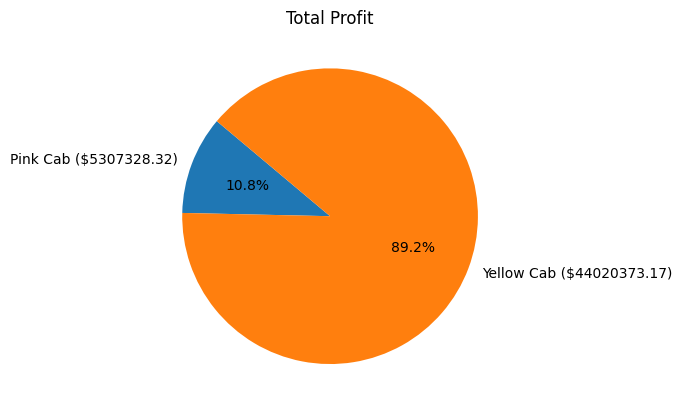

In [ ]:
profits = [pink_cab_pr,yellow_cab_pr]
labels = f'Pink Cab (${pink_cab_pr})', f'Yellow Cab (${yellow_cab_pr})'
plt.pie(profits, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Profit')
plt.show()

### 4.1.2 city wise profit

In [ ]:
# Calculate City Wise Total Profits for Each Cab Company
def Citywise_Profit_Calc(cab_data):
  total_pr = []
  for city,data in cab_data.items():
    net_pr = 0
    for i in data:
      pr = i[5]-i[6]
      net_pr=pr+net_pr
    total_pr.append(net_pr)

  return total_pr

#for pink cab
grouped_data=pink_cab_df.groupby('City')

pink_cab_citywise_data = {}

for city, group in grouped_data:
    pink_cab_citywise_data[city] = group.values

pink_cab_citywise_pr = Citywise_Profit_Calc(pink_cab_citywise_data)

#for yellow cab
grouped_data=yellow_cab_df.groupby('City')

yellow_cab_citywise_data = {}

for city, group in grouped_data:
    yellow_cab_citywise_data[city] = group.values

yellow_cab_citywise_pr = Citywise_Profit_Calc(yellow_cab_citywise_data)
formated_yellow_cab_citywise_pr=[ "{:.2f}".format(data) for data in yellow_cab_citywise_pr]

# Create DataFrame
data = {
    'Cities': pink_cab_df.City.unique(),
    'Pink Cab Profits($)': pink_cab_citywise_pr,
    'Yellow Cab Profits($)': formated_yellow_cab_citywise_pr,
}

city_wise_profits_df = pd.DataFrame(data)

# Display the data table
city_wise_profits_df


,Cities,Pink Cab Profits($),Yellow Cab Profits($)
0,ATLANTA GA,96050.076,746382.81
1,AUSTIN TX,147445.290,379255.74
2,BOSTON MA,262001.698,1506717.57
3,CHICAGO IL,318722.488,3068590.93
4,DALLAS TX,24730.112,1104003.15
5,DENVER CO,40584.939,357000.07
6,LOS ANGELES CA,1125732.065,3285976.58
7,MIAMI FL,162301.191,596000.05
8,NASHVILLE TN,64284.534,85247.68
9,NEW YORK NY,1511474.388,26451080.77


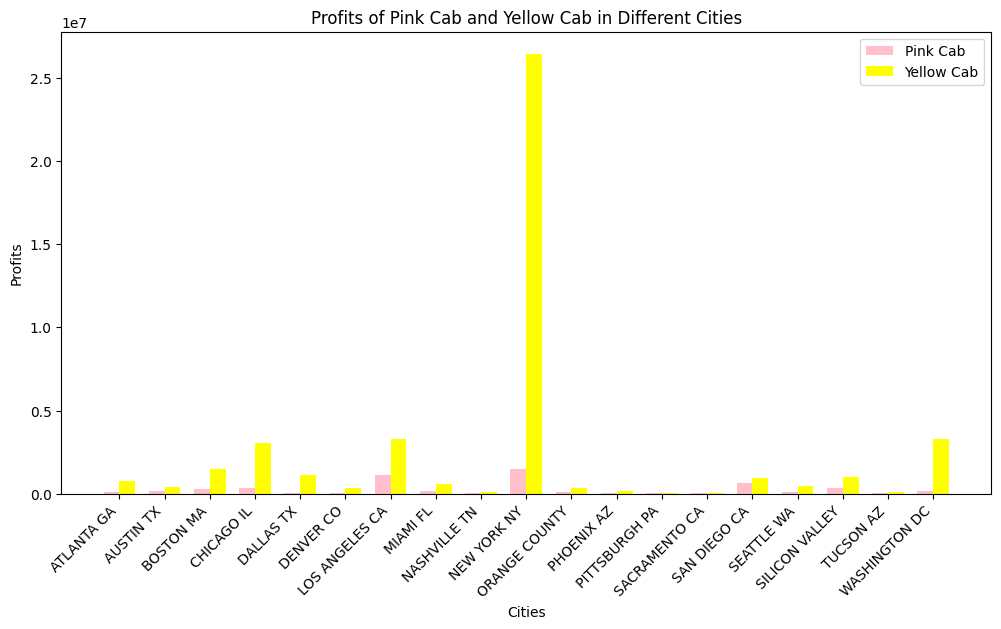

In [ ]:
cities = pink_cab_df.City.unique()

plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(cities))

plt.bar(index, pink_cab_citywise_pr, bar_width, color='pink', label='Pink Cab')
plt.bar(index + bar_width, yellow_cab_citywise_pr, bar_width, color='yellow', label='Yellow Cab')

plt.xlabel('Cities')
plt.ylabel('Profits')
plt.title('Profits of Pink Cab and Yellow Cab in Different Cities')
plt.xticks(index + bar_width / 2, cities, rotation=45, ha='right')
plt.legend()
plt.show()

### 4.2 Citywise Ride Analysis: Average Metrics and Earnings Breakdown




In [ ]:
# Calculate City Wise (Avg KM,Avg Price,Avg Cost,per KM Price,per km cost,Total Num of Rides and Earning per KM )
def Citywise_Profit_Calc(cab_data):
  total_avgkm_avgprice = []

  for city,data in cab_data.items():
    km = 0
    price = 0
    cost=0
    count=0
    for i in data:
      km=km+i[4]
      price=price+i[5]
      cost=cost+i[6]
      count=count+1

    avg_km = km / count
    avg_price = price / count
    avg_cost = cost/count
    per_km_price = avg_price / avg_km
    per_km_cost = avg_cost / avg_km
    per_km_net_profit = per_km_price - per_km_cost
    total_avgkm_avgprice.append([avg_km,avg_price,avg_cost,per_km_price,per_km_cost,count,per_km_net_profit])

  return total_avgkm_avgprice

#for pink cab
grouped_data=pink_cab_df.groupby('City')

pink_cab_citywise_data = {}

for city, group in grouped_data:
    pink_cab_citywise_data[city] = group.values

pink_cab_citywise_travell_data = Citywise_Profit_Calc(pink_cab_citywise_data)

#for yellow cab
grouped_data=yellow_cab_df.groupby('City')

yellow_cab_citywise_data = {}

for city, group in grouped_data:
    yellow_cab_citywise_data[city] = group.values

yellow_cab_citywise_travell_data = Citywise_Profit_Calc(yellow_cab_citywise_data)

In [ ]:
# Display City Wise (Avg KM,Avg Price,Avg Cost,per KM Price,per km cost and Total Num of Rides)

# Create DataFrame for Pink Cab
pink_cab_avg_data_df = pd.DataFrame(pink_cab_citywise_travell_data, columns=['Avg KM', 'Avg Price', 'Avg Cost', 'Per KM Price', 'Per KM Cost', 'Total Num of Rides','Per KM Nt Profit'], index=cities)

# Create DataFrame for Yellow Cab
yellow_cab_avg_data_df = pd.DataFrame(yellow_cab_citywise_travell_data, columns=['Avg KM', 'Avg Price', 'Avg Cost', 'Per KM Price', 'Per KM Cost', 'Total Num of Rides','Per KM Nt Profit'], index=cities)

# Display the data tables
print("Pink Cab Data:")
display(pink_cab_avg_data_df)
print("\nYellow Cab Data:")
display(yellow_cab_avg_data_df)


Pink Cab Data:


,Avg KM,Avg Price,Avg Cost,Per KM Price,Per KM Cost,Total Num of Rides,Per KM Nt Profit
ATLANTA GA,22.539824,302.131555,247.619594,13.404344,10.985871,1762,2.418473
AUSTIN TX,21.969176,320.435070,241.502901,14.585667,10.992807,1868,3.592860
BOSTON MA,22.740746,300.551489,250.030529,13.216430,10.994825,5186,2.221605
CHICAGO IL,22.511070,281.613731,247.565821,12.510011,10.997514,9361,1.512496
DALLAS TX,22.021203,260.025652,242.105281,11.807968,10.994190,1380,0.813778
DENVER CO,22.459218,276.202453,247.088437,12.297955,11.001649,1394,1.296306
LOS ANGELES CA,22.635629,305.624252,248.955132,13.501911,10.998375,19865,2.503536
MIAMI FL,22.299925,326.006309,244.936783,14.619166,10.983749,2002,3.635417
NASHVILLE TN,22.528066,282.062493,247.144224,12.520493,10.970503,1841,1.549990
NEW YORK NY,22.622415,357.074129,248.856589,15.784085,11.000443,13967,4.783642



Yellow Cab Data:


,Avg KM,Avg Price,Avg Cost,Per KM Price,Per KM Cost,Total Num of Rides,Per KM Nt Profit
ATLANTA GA,22.248247,422.413446,293.615723,18.986370,13.197252,5795,5.789118
AUSTIN TX,22.512840,422.248940,296.999358,18.755916,13.192443,3028,5.563473
BOSTON MA,22.543649,359.140431,297.656812,15.930891,13.203577,24506,2.727314
CHICAGO IL,22.659493,364.021927,299.097441,16.064875,13.199653,47264,2.865222
DALLAS TX,22.599395,493.807790,297.958374,21.850487,13.184352,5637,8.666135
DENVER CO,22.444097,443.235413,296.382238,19.748418,13.205354,2431,6.543065
LOS ANGELES CA,22.688117,416.231136,299.574768,18.345777,13.204038,28168,5.141739
MIAMI FL,22.635606,432.944872,299.072443,19.126718,13.212478,4452,5.914241
NASHVILLE TN,22.968837,376.245577,303.321981,16.380698,13.205805,1169,3.174893
NEW YORK NY,22.496362,604.841911,296.977659,26.886209,13.201141,85918,13.685068


### 4.2.1 Per KM Net Profit Analysis


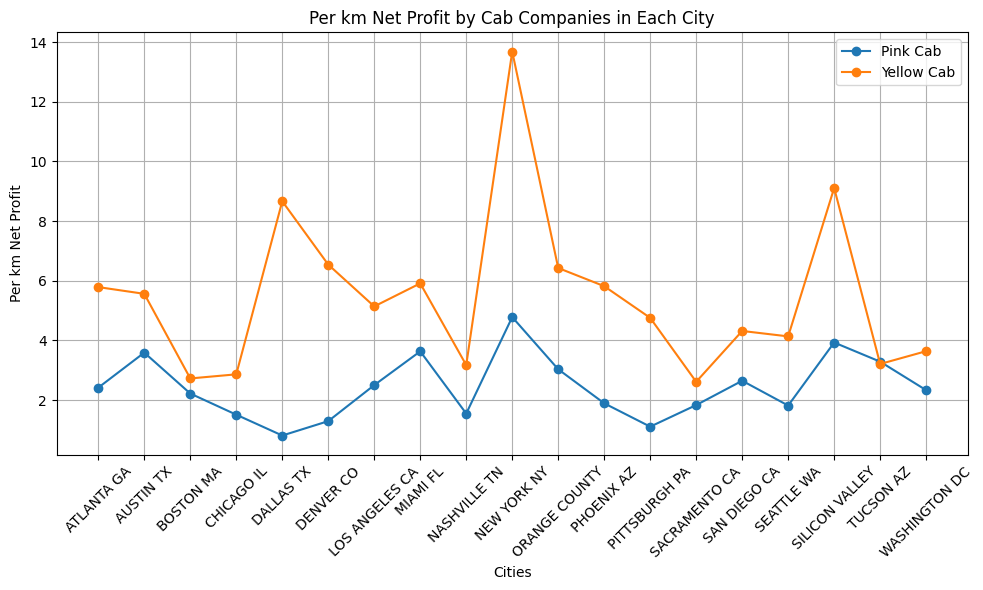

In [ ]:
# Extracting data for Per KM Net Profit
pink_netpr_data = [subdata[-1] for subdata in pink_cab_citywise_travell_data ]
yellow_netpr_data = [subdata[-1] for subdata in yellow_cab_citywise_travell_data ]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(cities, pink_netpr_data, marker='o', label='Pink Cab')
plt.plot(cities, yellow_netpr_data, marker='o', label='Yellow Cab')

# Adding labels and title
plt.xlabel('Cities')
plt.ylabel('Per km Net Profit')
plt.title('Per km Net Profit by Cab Companies in Each City')
plt.xticks(rotation=45)  # Rotating city names for better readability
plt.legend()

# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()


### 4.3 Customer Data Analysis

### 4.3.1 Calculate Percentage of taxi Users

In [ ]:
# Calculate Percentage of Users from Total Population

user_percentage = []
for i in city_df.values:
  pop = i[1]
  pop_int = int(pop.replace(',', ''))

  user = i[2]
  user_int = int(user.replace(',', ''))

  per = round((user_int*100)/pop_int,2)
  user_percentage.append(per)


data = {
    'City': city_df['City'],
    'Population': city_df['Population'],
    'User':city_df['Users'],
    'Percent_of_Users': user_percentage
}

user_percentage_df = pd.DataFrame(data)
user_percentage_df


,City,Population,User,Percent_of_Users
0,NEW YORK NY,"8,405,837","302,149",3.59
1,CHICAGO IL,"1,955,130","164,468",8.41
2,LOS ANGELES CA,"1,595,037","144,132",9.04
3,MIAMI FL,"1,339,155","17,675",1.32
4,SILICON VALLEY,"1,177,609","27,247",2.31
5,ORANGE COUNTY,"1,030,185","12,994",1.26
6,SAN DIEGO CA,"959,307","69,995",7.30
7,PHOENIX AZ,"943,999","6,133",0.65
8,DALLAS TX,"942,908","22,157",2.35
9,ATLANTA GA,"814,885","24,701",3.03


### 4.3.2 Gender-wise User Percentage Calculation

In [ ]:
# Calculate Gender wise Users Percentage
total_Males_per = round(len(customer_df[customer_df['Gender'] == 'Male']) / (len(customer_df)) *100,2)
total_fermale_per = round(len(customer_df[customer_df['Gender'] == 'Female']) / (len(customer_df)) *100,2)


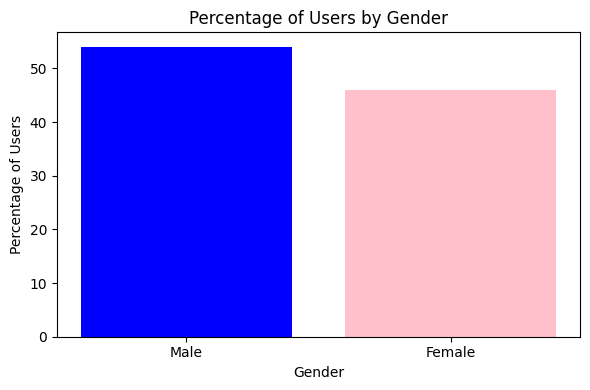

In [ ]:
# Data
gender = ['Male', 'Female']
percentage = [total_Males_per,total_fermale_per]

# Creating the bar plot
plt.figure(figsize=(6, 4))
plt.bar(gender, percentage, color=['blue', 'pink'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of Users')
plt.title('Percentage of Users by Gender')

# Display the plot
plt.tight_layout()
plt.show()


### 4.3.3 Cab Usage by Age Groups

In [ ]:
# Calulate Cab Uses by Age Groups
bins = [15, 23, 35, 50, 65, float('inf')]  # last bin is for 80+

# Define labels for age groups
labels = ['15-23', '23-35', '35-50', '50-65', '65+']

# Create 'age_group' column using pd.cut()
customer_df['age_group'] = pd.cut(customer_df['Age'], bins=bins, labels=labels, right=False)

age_group_data=customer_df.groupby('age_group').size().values

# Create DataFrame
data = {
    'Age Group': labels,
    'Cab Uses(Num of Rides)': age_group_data
}

age_wise_cab_uses_df = pd.DataFrame(data)

# Display the data table
age_wise_cab_uses_df

,Age Group,Cab Uses(Num of Rides)
0,15-23,7903
1,23-35,18837
2,35-50,14084
3,50-65,7855
4,65+,492


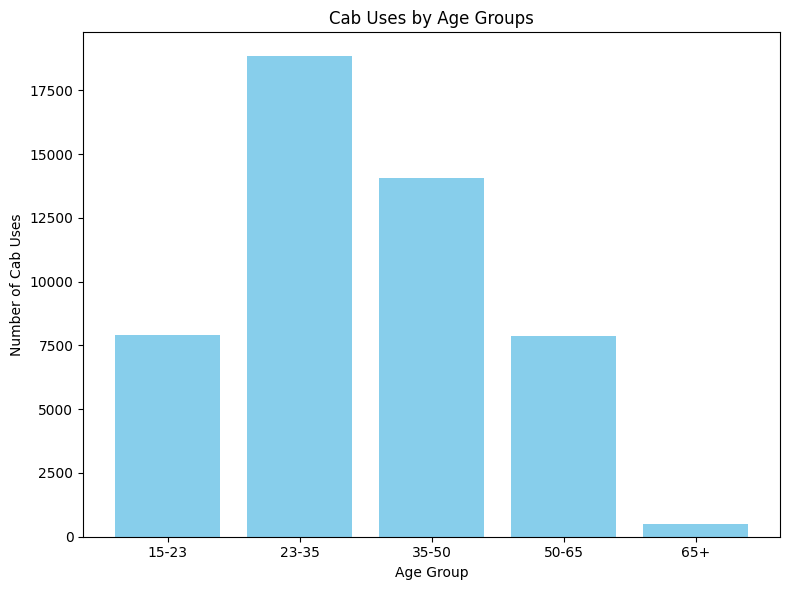

In [ ]:
# Data
age_groups = ['15-23', '23-35', '35-50', '50-65', '65+']
cab_uses = age_group_data

# Creating the histogram
plt.figure(figsize=(8, 6))
plt.bar(age_groups, cab_uses, color='skyblue')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Cab Uses')
plt.title('Cab Uses by Age Groups')

# Display the plot
plt.tight_layout()
plt.show()


### 4.3.4 Average Salary Comparison by Age Group and Gender

In [ ]:
def genderwisedata(gen_data):
    final_data = []
    for i in age_groups:
        data = gen_data[gen_data['age_group'] == i]
        final_data.append(data.values)

    avg_sal_data = []
    for data in final_data:
        sal = 0
        count = 0
        for i in data:
            sal = sal + i[3]
            count = count + 1

        if count != 0:
            avg_sal = sal / count
        else:
            avg_sal = 0  # If count is zero, set average salary to zero

        avg_sal_data.append(round(avg_sal, 2))
    return avg_sal_data

# Example usage
male_cust_df = customer_df[customer_df['Gender'] == 'Male']
female_cust_df = customer_df[customer_df['Gender'] == 'Female']

male_age_avg_salary = genderwisedata(male_cust_df)
female_age_avg_salary = genderwisedata(female_cust_df)

# Create DataFrame
data = {
    'Age Group': age_groups,
    'Average Salary (Male)': male_age_avg_salary,
    'Average Salary (Female)': female_age_avg_salary
}

gender_wise_avg_sal_df = pd.DataFrame(data)

# Display the data table
gender_wise_avg_sal_df

,Age Group,Average Salary (Male),Average Salary (Female)
0,15-23,15047.53,14977.84
1,23-35,15066.87,14925.55
2,35-50,14978.40,15049.66
3,50-65,15095.72,15027.92
4,65+,14816.53,14943.17


### 4.3.5 Transaction Mode Percentage Calculation

In [ ]:
# Calculate Percentage for Mode of Transaction

cash_transactions = round(len(transaction_df[transaction_df['Payment_Mode'] == 'Cash']) / (len(transaction_df)) *100,2)
card_transactions = round(len(transaction_df[transaction_df['Payment_Mode'] == 'Card']) / (len(transaction_df)) *100,2)

([<matplotlib.patches.Wedge at 0x7e6f5c6e56f0>,
 [Text(0.33926127295919106, 1.046375548581918, 'Cash Transaction'),
  Text(-0.3392612729591914, -1.0463755485819177, 'Card Transaction')],
 [Text(0.18505160343228602, 0.5707502992265006, '40.0%'),
  Text(-0.18505160343228622, -0.5707502992265006, '60.0%')])

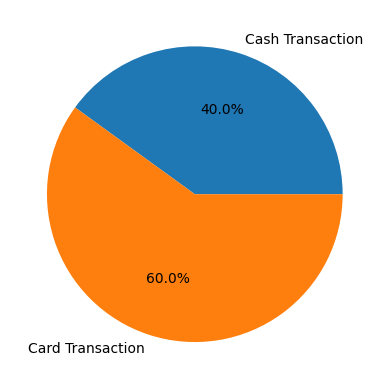

In [ ]:
transaction_mode = [cash_transactions,card_transactions]
labels = ['Cash Transaction','Card Transaction']
plt.pie(transaction_mode, labels=labels, autopct='%1.1f%%')

## 5. Recommendations

**Strategic Insights for Cab Industry Investment :**


---



1. **Profitability and Investment Choice**:
   - Yellow Cab's superior profitability ($44,020,373.17 vs. $5,307,328.32) and market dominance make it the prime investment choice for XYZ.

2. **City-wise Profit and Market Potential**:
   - Yellow Cab outperforms Pink Cab in multiple cities, like New York and Chicago, with significantly higher profits.
   - Investing in cities with high market potential, such as New York, San Francisco, and Washington DC, aligns with XYZ's growth strategy.

3. **Average Data Analysis**:
   - Pink Cab offers higher profitability per ride, while Yellow Cab promises higher market share and total revenue.
   - XYZ's decision should consider these factors based on its goals and priorities.

4. **Transaction Insights and Marketing Strategy**:
   - 60% of transactions are via cards, signaling a preference for electronic payments.
   - XYZ can invest in fintech solutions to boost card usage and understand cash transaction patterns to guide marketing strategy.

5. **User Demographics and Tailored Marketing**:
   - Targeting age groups with the highest cab usage, such as the 23-35 and 35-50 age groups, can optimize XYZ's marketing impact.
   - Lifestyle preferences and economic trends should inform XYZ's marketing strategy for maximum engagement and conversion.

6. **Conclusion:**
* Investing in **Yellow Cab** emerges as the optimal choice for XYZ after analyzing total profits, city-wise earnings, pricing, costs, demographics, user percentages, age group usage, and transaction modes. Especially in key metropolitan hubs like New York, San Francisco, and Washington DC, where Yellow Cab demonstrates significant market dominance and profitability, this investment promises exponential growth and lucrative returns.